In [1]:
# !pip install pyspark

In [2]:
# pip install --upgrade pip

In [3]:
import findspark
findspark.init()
findspark.find()
from __future__ import division
from pyspark import SparkConf, SparkContext, SQLContext
import pyspark.sql.functions as F


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

In [6]:
df = spark.read.option('inferSchema', True).csv('Life_Expectancy.csv', header=True)
df.show(2)

+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|    Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|       GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|Afghanistan|2015|Developing|            65.0|            263|           62|   

In [7]:
# Tabular visualization

# Pandas was better! But we can convert Spark dataframe into
# pandas dataframe. But since we just want to see the top few 
# rows it makes sense to convert only top rows of the Spark 
# dataframe to Pandas. It saves the computer memory consumption. 
# Usually Spark dataframe is meant to handle really large data.

df.limit(5).toPandas()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [13]:
df = df.select('Country', 'Year', 'Alcohol', 'GDP', 'Population')
df.show(3)

+-----------+----+-------+----------+-----------+
|    Country|Year|Alcohol|       GDP| Population|
+-----------+----+-------+----------+-----------+
|Afghanistan|2015|   0.01| 584.25921|3.3736494E7|
|Afghanistan|2014|   0.01|612.696514|   327582.0|
|Afghanistan|2013|   0.01|631.744976|3.1731688E7|
+-----------+----+-------+----------+-----------+
only showing top 3 rows



In [14]:
# Histogram 

# This might be the easiest of all. Spark RDDs has .histogram() 
# method which gives histogram values for specified number of bins. 
# We just need to plot these bins in python. 
def histogram(df, col, bins=10, xname=None, yname=None):
    
    '''
    This function makes a histogram from spark dataframe named 
    df for column name col. 
    '''
    
    # Calculating histogram in Spark 
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)
    
    # Preprocessing histogram points and locations 
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]
    
    # Making a bar plot 
    plt.bar(loc, vals[1], width=width)
    plt.xlabel(col)
    plt.ylabel(yname)
    plt.show()

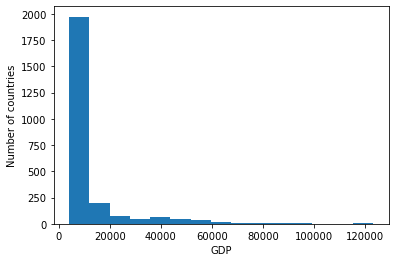

In [15]:
# Plotting the GDP histogram 
# There are a lots of lots of very very poor country. 
# The world is skewwwwwwwd!

histogram(df, 'GDP', bins=15, yname='Number of countries')

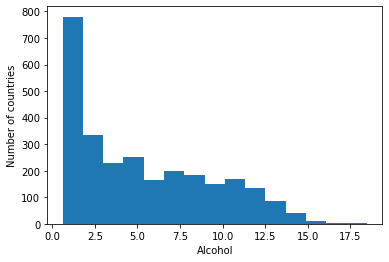

In [16]:
histogram(df, 'Alcohol', bins=15, yname='Number of countries')

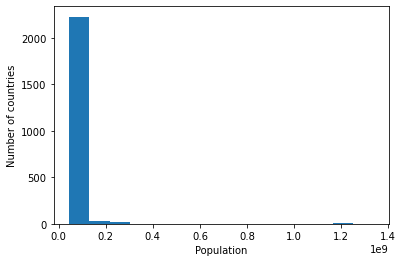

In [17]:
histogram(df, 'Population', bins=15, yname='Number of countries')

In [18]:
df.select('Population').summary().show()

+-------+--------------------+
|summary|          Population|
+-------+--------------------+
|  count|                2286|
|   mean|1.2753375120052498E7|
| stddev| 6.101209650842794E7|
|    min|                34.0|
|    25%|            195553.0|
|    50%|           1384969.0|
|    75%|           7423289.0|
|    max|       1.293859294E9|
+-------+--------------------+



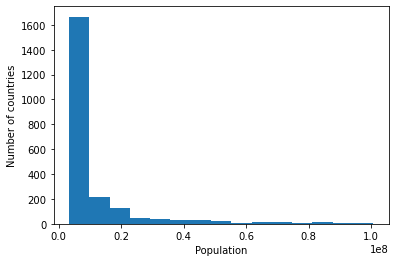

In [19]:
histogram(df.filter(df['Population']<100000000), \
          'Population', bins=15, yname='Number of countries')

In [20]:
# Line plot 

# This type of plots are usually represented for the time series. 
# Sometimes distribution functions are also represented as line plot. 
# First we group by the data in time (or on the variable of which 
# distribution is of interest) and then we apply some sort of averaging 
# on the grouped data. I have included few averaging in my implemantation. 
# Others can be added similarly or can be done manually outside funtion.

def lineplot(df, x, y, measure='mean'):
    
    '''
    This function makes a line plot from Spark dataframe df with 
    independent variable x and averaged over y.
    '''
    
    if measure == 'mean':
        
        # Grouping the dataframe by x and averaging over y
        # Sorting is important because Spark shuffle the values 
        # when doing the calculation
        
        pd_df = df.groupBy(x).mean(y).toPandas().sort_values(by=x)
        
        # Making plot using pandas 
        pd_df.plot(x, 'avg({})'.format(y), legend=False)
        
    elif measure == 'total':
        pd_df = df.groupBy(x).sum(y).toPandas().sort_values(by=x)
        pd_df.plot(x, 'sum({})'.format(y), legend=False)
        
    elif measure == 'count':
        pd_df = df.groupBy(x).count().toPandas().sort_values(by=x)
        pd_df.plot(x, 'count', legend=False)
    
    plt.ylabel(y)
    plt.show()

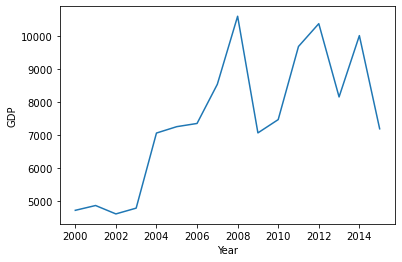

In [21]:
lineplot(df, 'Year', 'GDP', measure='mean')

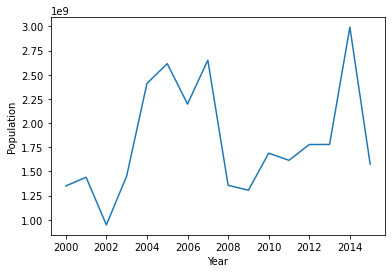

In [22]:
lineplot(df, 'Year', 'Population', measure='total')

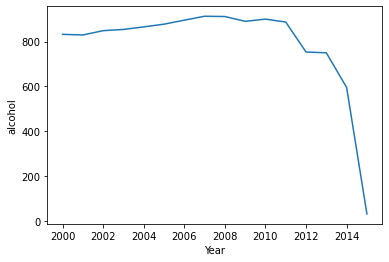

In [23]:
lineplot(df, 'Year', 'alcohol', measure='total')

In [24]:
# Bar plot 

# In bar plot usually we are interested on top few entries 
# if thre are many. For this we can order the dataframe to 
# get the top entries on top. Then we limit the number of 
# entries, which is also the number of bars we want to see in 
# the plot, before converting it to the pandas datafrmae. 
def barplot(df, col, lim=10, yname=None):
    
    '''
    This function makes a bar plot for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

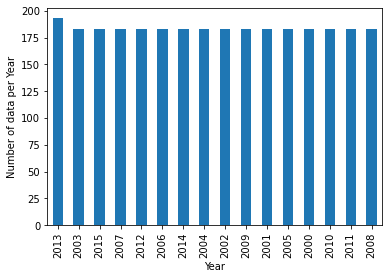

In [25]:
# Everybody is participating every year (almost)

barplot(df, 'Year', lim=20, yname='Number of data per Year')

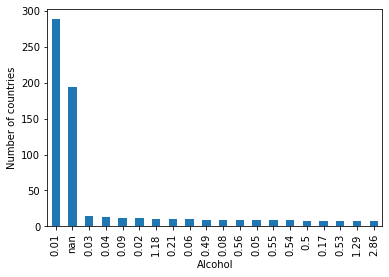

In [26]:
# Most of the world population consumes very little alcohol. 

barplot(df, 'Alcohol', lim=20, yname='Number of countries')

Which country has the largest population?

Which country has the largest GDP?

In [27]:
# Pie chart 

# Idea of bar chart is exactly similar to the bar plot 
# Just replace bar plot at the end by pir chart. 
def pieplot(df, col, lim=10, yname=None):
    
    '''
    This function makes a pie chart for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False)
    plt.ylabel(None)
    plt.show()

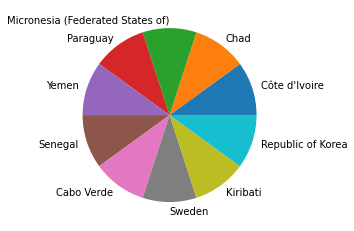

In [28]:
pieplot(df, 'Country')

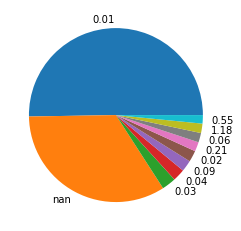

In [29]:
pieplot(df, 'Alcohol')

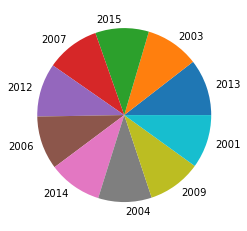

In [30]:
pieplot(df, 'Year')

In [31]:
# Box plot 

# Box plot can be computationally very heavy. Usually it takes all 
# the data, calculates the quartiles and also indicates the outlier. 
# It could be done easier if we ignore the outlier part. 
# However, outliers are import part of box plot. So, I choose sampling 
# method. I choose a fraction of sample of the total data and make a 
# Box plot out of that. 

# An alternative approach could be using quartiles and outliers which 
# is not done here. 
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
def boxplot(df, col, group_by, samp_size=10000): 
    
    '''
    This function makes a box plot for a Spark dataframe df 
    grouping them by a column name called group_by and their
    aggrigate on another column called col. 
    '''
    
    # Selecting sample for the large dataset 
    # For samll data sampling is not done. For the large data 
    # sample size is the specified number. 
    
    true_samp_size = min(samp_size/df.count(), 1.0)
    pd_df = df.sample(False, true_samp_size).toPandas()
    
    # Making plot 
    pd_df.boxplot(col, by=group_by, figsize=(8, 5))
    plt.ylabel(col)
#     plt.xticks([2000, 2005, 2010, 2015])
    plt.title(None)
    plt.show()

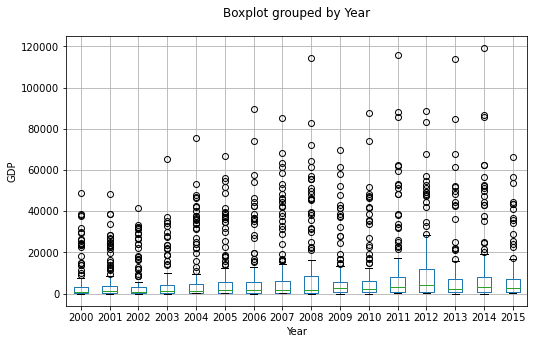

In [32]:
# The rich countries are outliers in our world. 
# Being poor is the norm. 

boxplot(df, 'GDP', 'Year')

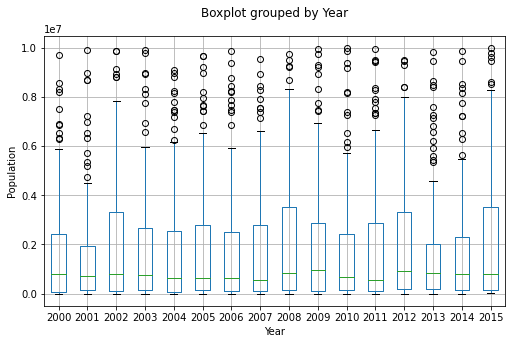

In [33]:
boxplot(df.filter(df['Population']<10000000), 'Population', 'Year')